In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telco=pd.read_csv('../data/telco_customer_churn_cleaned.csv')
contract_churn = pd.read_csv('../data/contract_churn.csv')
payment_churn = pd.read_csv('../data/payment_churn.csv')    
demo_churn = pd.read_csv('../data/demo_churn.csv')
internet_churn = pd.read_csv('../data/internet_churn.csv')      
service_churn = pd.read_csv('../data/service_churn.csv')
feature_churn = pd.read_csv('../data/feature_churn.csv')    
ranked_payment = pd.read_csv('../data/ranked_payment.csv')
tenure_churn = pd.read_csv('../data/tenure_churn.csv')  
overall_metrics = pd.read_csv('../data/overall_metrics.csv')
avg_metrics = pd.read_csv('../data/avg_metrics.csv')

In [3]:
telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureYears,TotalServices,ChurnBinary
0,Female,0,Yes,No,1.0,No,No,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.0,2,0
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,2.0,4,0
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.0,4,1
3,Male,0,No,No,45.0,No,No,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.0,4,0
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2.0,8,0
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,6.0,7,0
7040,Female,0,Yes,Yes,11.0,No,No,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,2,0
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0.0,3,1


## Univariate Analysis (Distribution of Individual Variables) –

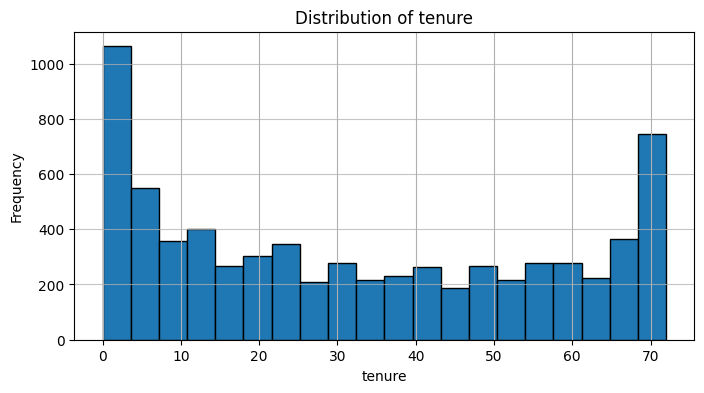

<Figure size 640x480 with 0 Axes>

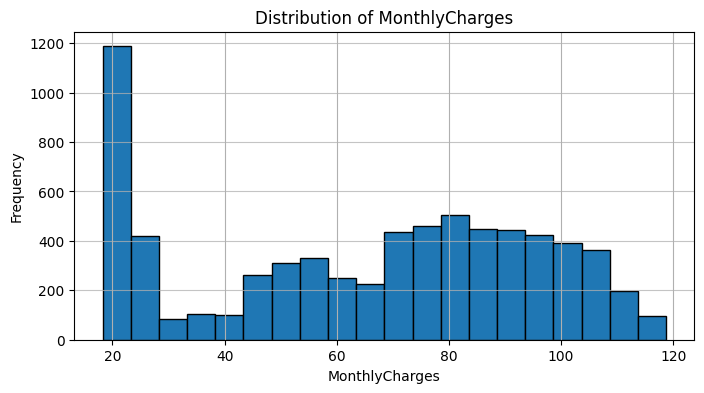

<Figure size 640x480 with 0 Axes>

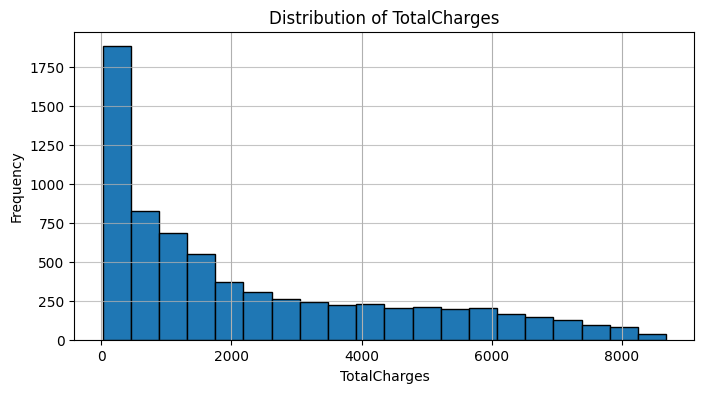

<Figure size 640x480 with 0 Axes>

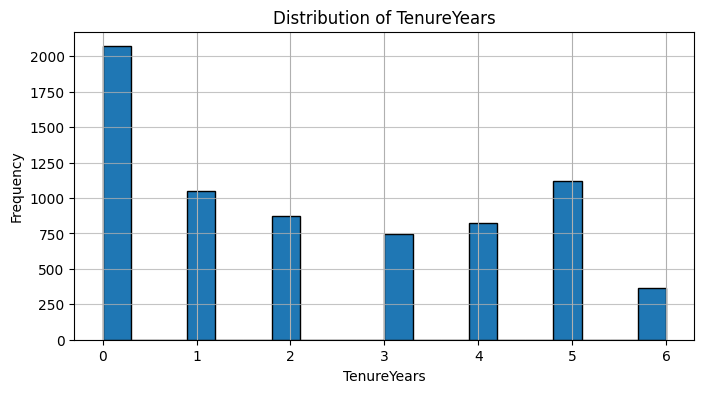

<Figure size 640x480 with 0 Axes>

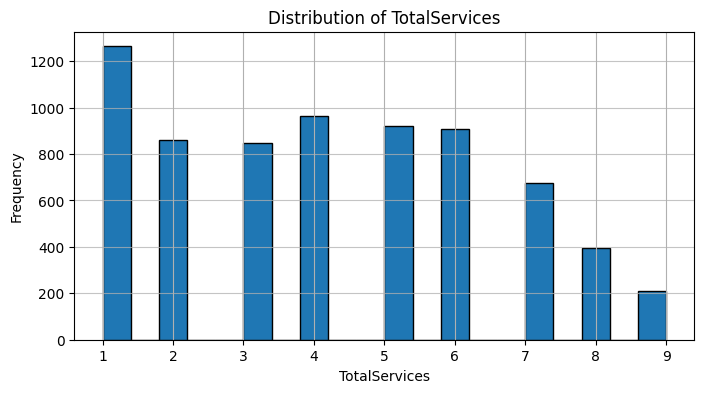

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges  TenureYears  \
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000   
mean        0.162147    32.371149       64.761692   2281.916928     2.285958   
std         0.368612    24.559481       30.090047   2265.270398     2.017253   
min         0.000000     0.000000       18.250000     18.800000     0.000000   
25%         0.000000     9.000000       35.500000    402.225000     0.000000   
50%         0.000000    29.000000       70.350000   1397.475000     2.000000   
75%         0.000000    55.000000       89.850000   3786.600000     4.000000   
max         1.000000    72.000000      118.750000   8684.800000     6.000000   

       TotalServices  ChurnBinary  
count    7043.000000  7043.000000  
mean        4.146244     0.265370  
std         2.312720     0.441561  
min         1.000000     0.000000  
25%         2.000000     0.000000  
50%         4.000000     0.000000  
75%         6.000000     1.

<Figure size 640x480 with 0 Axes>

In [4]:
#Numerical variables
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TenureYears', 'TotalServices']
for col in num_cols:
    plt.figure(figsize=(8,4))
    telco[col].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    plt.savefig(f'../assets/{col}_dist.png')
#summary statistics
print(telco.describe())

#### Insights: Note skewness (e.g., tenure is right-skewed with many short-tenure customers ~0-10 months, indicating early churn risk). Business: High concentration in low-tenure suggests onboarding improvements.

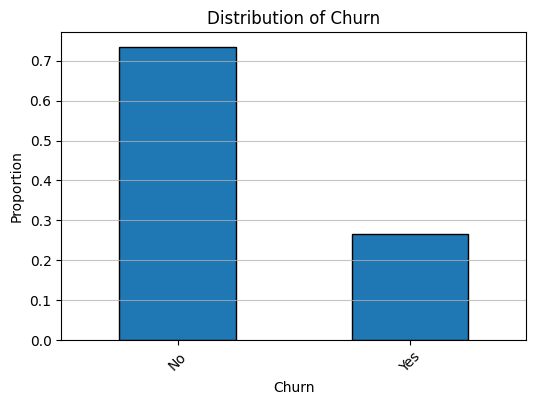

<Figure size 640x480 with 0 Axes>

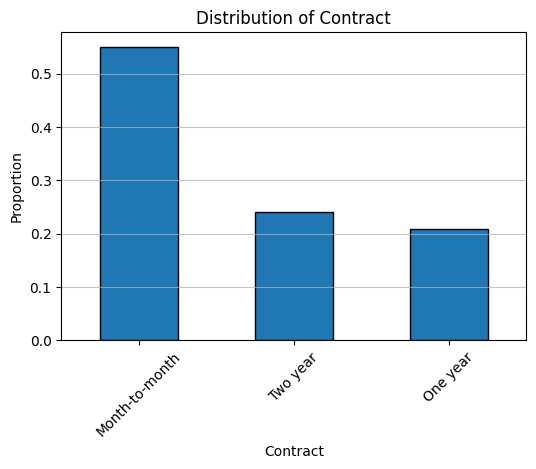

<Figure size 640x480 with 0 Axes>

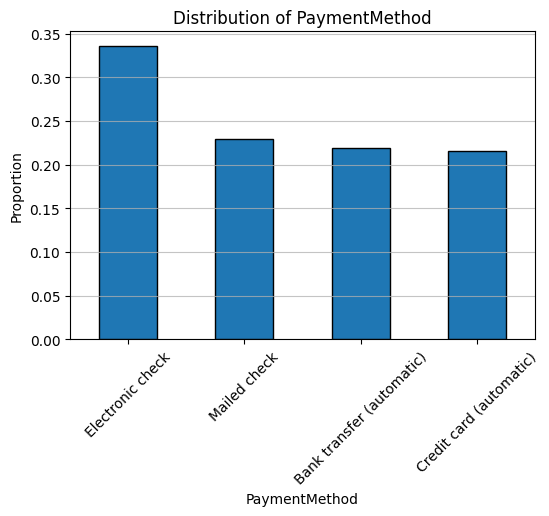

<Figure size 640x480 with 0 Axes>

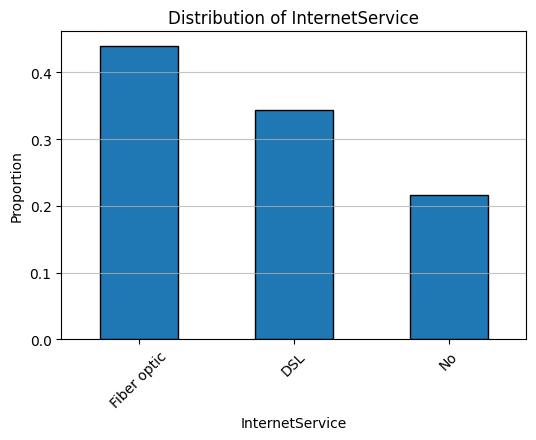

<Figure size 640x480 with 0 Axes>

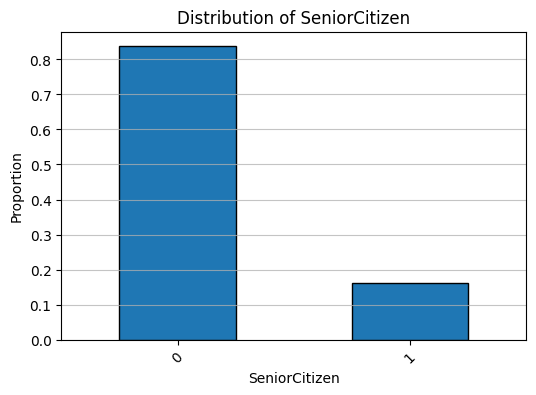

<Figure size 640x480 with 0 Axes>

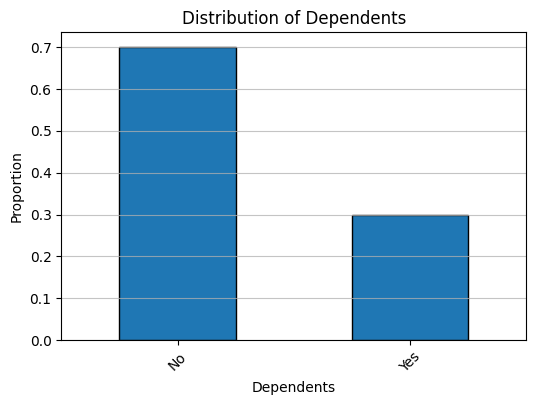

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [5]:
# Categorical variables
cat_cols = ['Churn', 'Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen', 'Dependents']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    telco[col].value_counts(normalize=True).plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    plt.savefig(f'../assets/{col}_dist.png')
#summary statistics
for col in cat_cols: print(telco[col].value_counts())

### Bivariate Analysis (Relationships with Churn)

#### 1. Numerical vs. Churn:

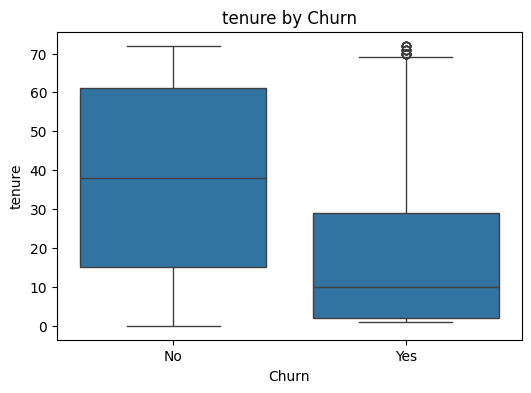

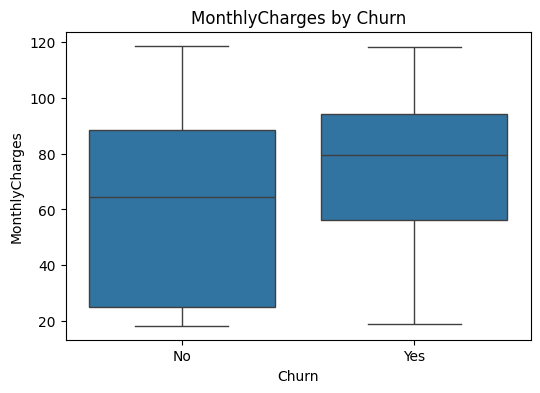

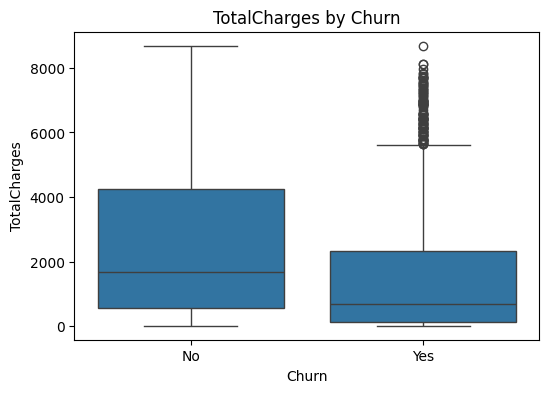

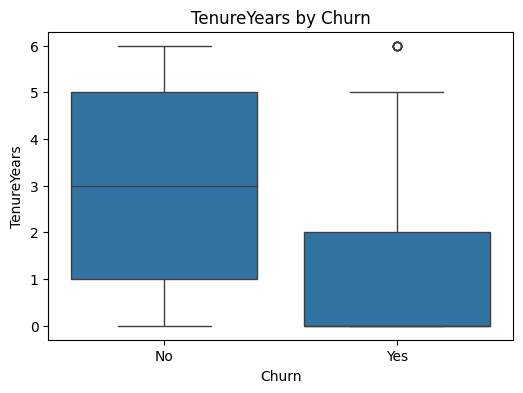

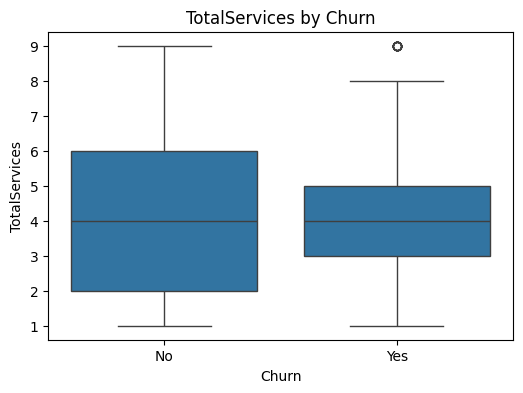

In [6]:
#num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TenureYears', 'TotalServices']
# Box plots for comparision
for col in num_cols:

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=telco)  
    plt.title(f'{col} by Churn')
    plt.suptitle('')  # Remove default title if using boxplot
    plt.show()

### Insights: Churned customers have lower tenure (~10 vs. 37 months) and higher MonthlyCharges (~74 vs. 61). Business: Price sensitivity in short-term customers—suggest bundling discounts.

#### 2. Categorical vs. Churn (Using aggregations for efficiency):

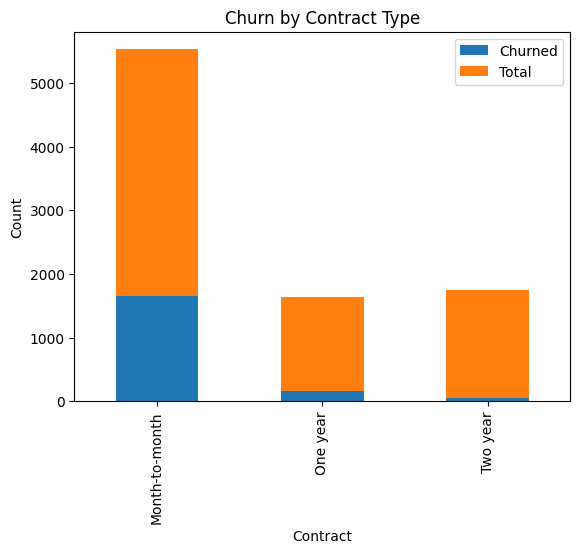

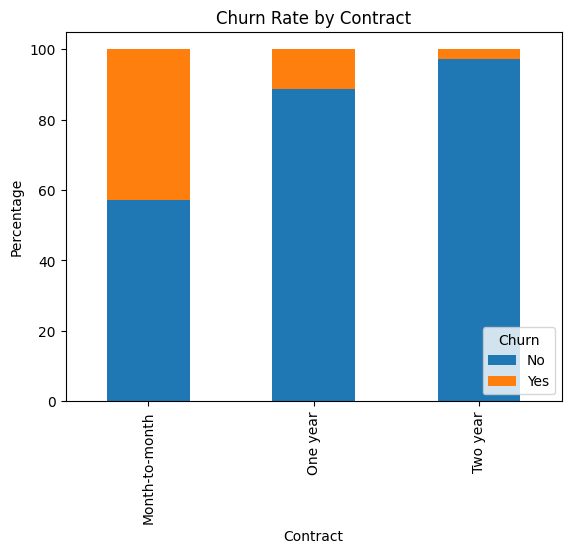

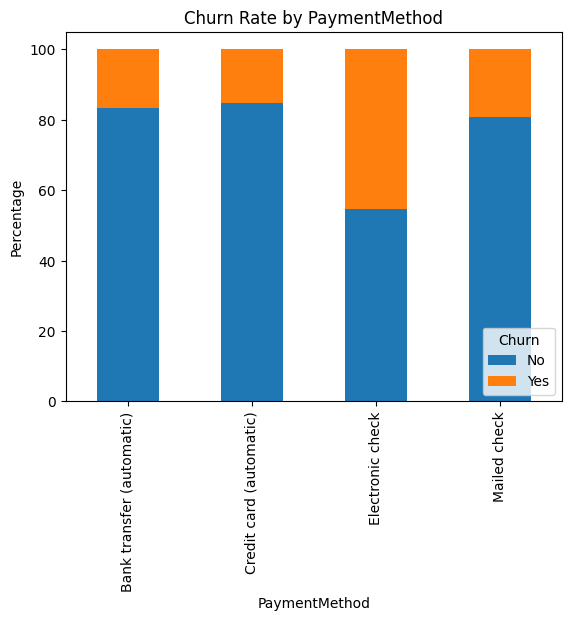

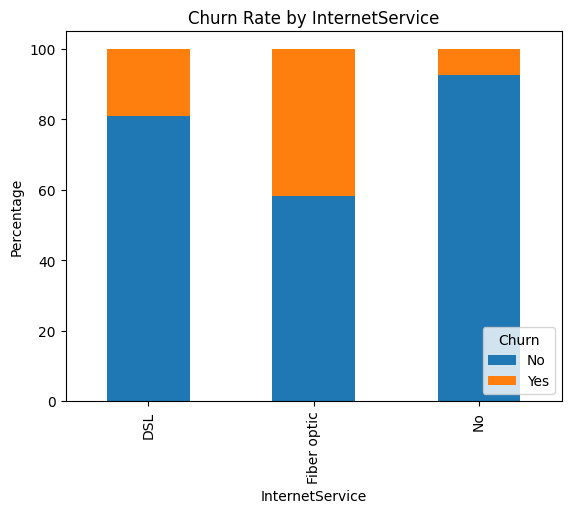

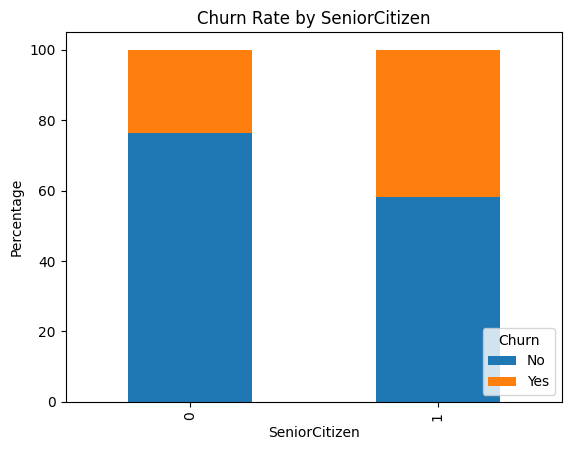

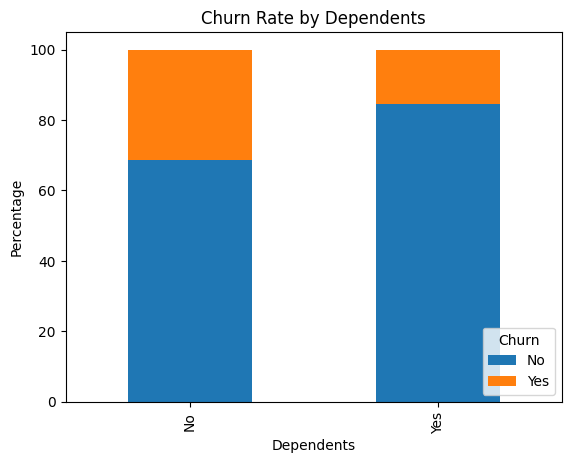

In [7]:
# Stacked Bar charts for aggregated comparison
# Example with contract_churn from aggregation
contract_churn.plot(kind='bar', x='Contract', y=['Churned', 'Total'], stacked=True)
plt.title('Churn by Contract Type')
plt.ylabel('Count')
plt.show()

# Crosstab for others
for col in cat_cols[1:]:  # Skip Churn
    crosstab = pd.crosstab(telco[col], telco['Churn'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Percentage')
    plt.legend(title='Churn', loc='lower right')
    plt.show()

### Insights: Fiber optic InternetService has ~42% churn (vs. 19% DSL). Electronic check PaymentMethod: ~45% churn. Seniors churn at ~42% (vs. 24% non-seniors). Business: Target seniors with simplified billing and fiber users with better support.

#### Correlation for Numerics:

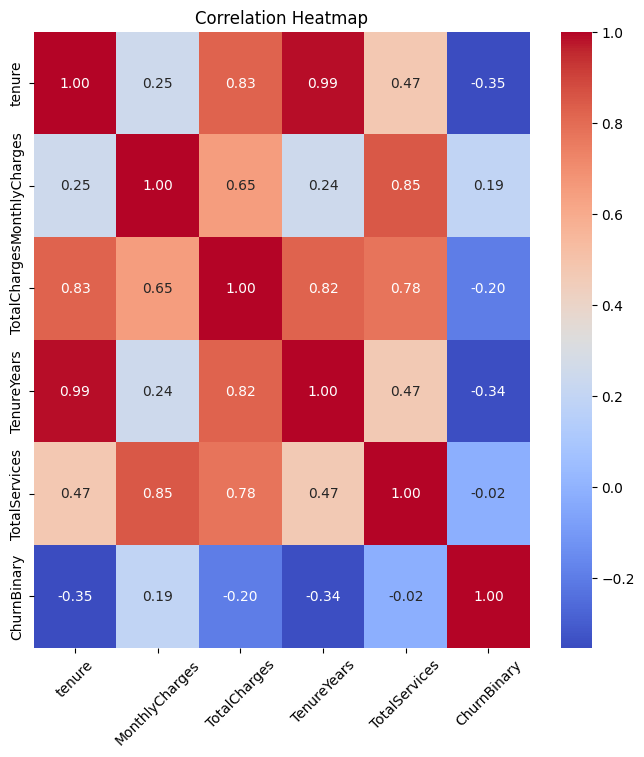

<Figure size 640x480 with 0 Axes>

In [8]:
corr = telco[num_cols + ['ChurnBinary']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f'../assets/correlation_heatmap.png')

### Insights: Tenure negatively correlates with Churn (-0.35); MonthlyCharges positively (0.19). Business: Longer contracts reduce churn.

# Multivariate Analysis (Interactions Between Variables)

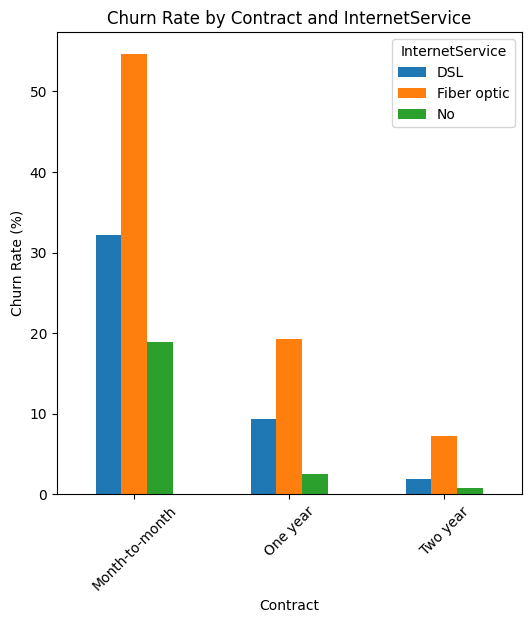

<Figure size 640x480 with 0 Axes>

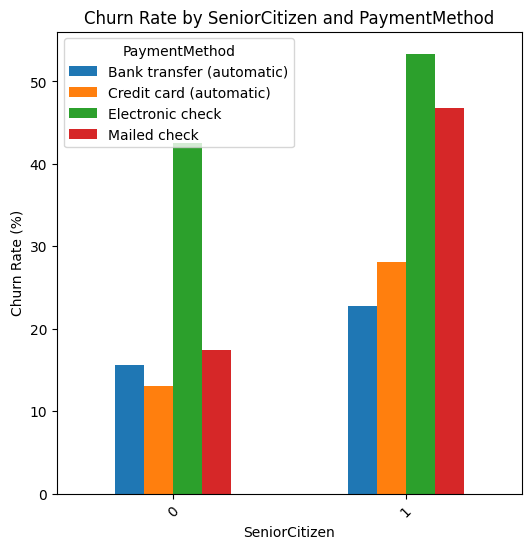

<Figure size 640x480 with 0 Axes>

In [9]:
#Groupby Multi-Factors:
# Churn rate by Contract and InternetService
multi_group = telco.groupby(['Contract', 'InternetService'])['ChurnBinary'].mean() * 100
multi_group.unstack().plot(kind='bar', figsize=(6,6))
plt.title('Churn Rate by Contract and InternetService')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f'../assets/{col}_bar.png')

# By SeniorCitizen and PaymentMethod
senior_payment = telco.groupby(['SeniorCitizen', 'PaymentMethod'])['ChurnBinary'].mean() * 100
senior_payment.unstack().plot(kind='bar', figsize=(6,6))
plt.title('Churn Rate by SeniorCitizen and PaymentMethod')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f'../assets/churn_rate_bar.png')

### Insights: Month-to-month with fiber optic: ~50% churn. Seniors on electronic check: ~60% churn. Business: Personalized offers, like auto-pay incentives for seniors.

C:\Users\rakib\AppData\Local\Temp\ipykernel_17696\2135145210.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


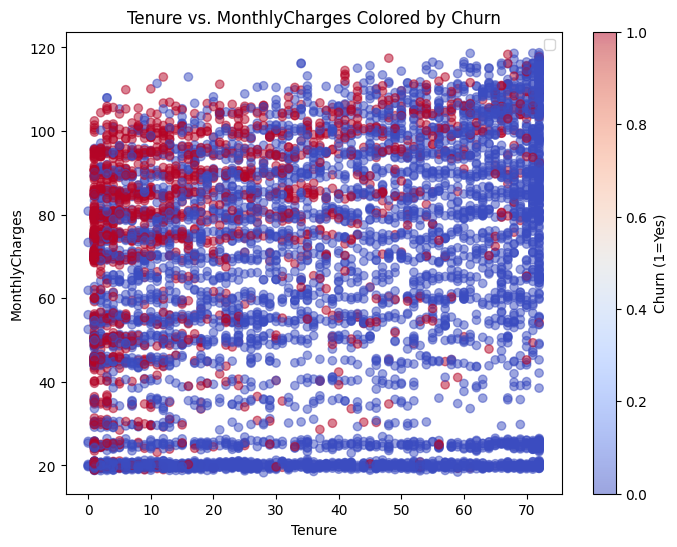

<Figure size 640x480 with 0 Axes>

In [10]:
# Scatter plots for numerical interactions
plt.figure(figsize=(8,6))
plt.scatter(telco['tenure'], telco['MonthlyCharges'], c=telco['ChurnBinary'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Churn (1=Yes)')
plt.title('Tenure vs. MonthlyCharges Colored by Churn')
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
plt.legend()
plt.show()
plt.savefig(f'../assets/scatter_plot.png')

### Insights: Clusters of churn in low tenure + high charges. Business: Early intervention for new high-bill customers.

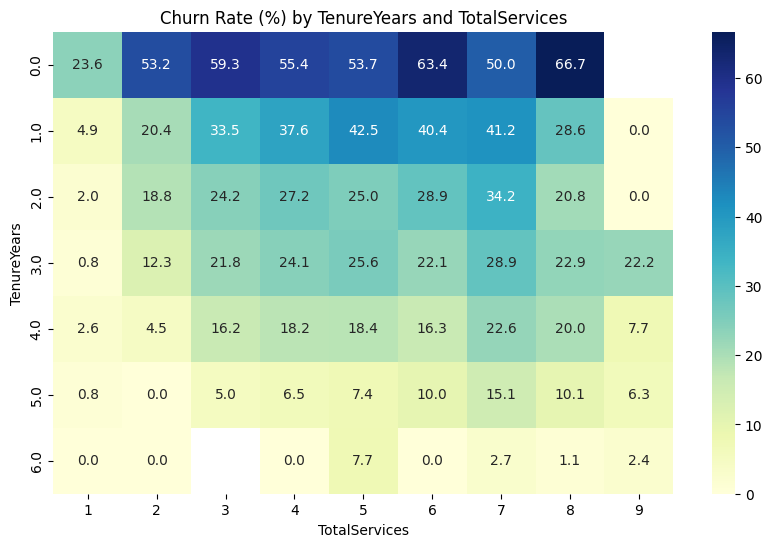

<Figure size 640x480 with 0 Axes>

In [11]:
# Pivot tables
pivot = pd.pivot_table(telco, values='ChurnBinary', index='TenureYears', columns='TotalServices', aggfunc='mean') * 100
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Churn Rate (%) by TenureYears and TotalServices')
plt.show()
plt.savefig(f'../assets/pivottables.png')

#### Insights: Low services in early years: ~70% churn; drops with more services/time. Business: Upsell add-ons during onboarding.

## Key Insights Summary and Hypothesis Generation

In [12]:
insights = pd.DataFrame({
    'Factor': ['Contract', 'InternetService', 'PaymentMethod', 'Tenure', 'MonthlyCharges'],
    'Insight': ['Month-to-month: 42% churn', 'Fiber optic: 42% churn', 'Electronic check: 45% churn', 'Low tenure: High churn', 'High charges: Positive correlation'],
    'Business Implication': ['Promote long-term contracts', 'Improve fiber support', 'Encourage auto-pay', 'Enhance onboarding', 'Offer tiered pricing']
})
print(insights)

            Factor                             Insight  \
0         Contract           Month-to-month: 42% churn   
1  InternetService              Fiber optic: 42% churn   
2    PaymentMethod         Electronic check: 45% churn   
3           Tenure              Low tenure: High churn   
4   MonthlyCharges  High charges: Positive correlation   

          Business Implication  
0  Promote long-term contracts  
1        Improve fiber support  
2           Encourage auto-pay  
3           Enhance onboarding  
4         Offer tiered pricing  


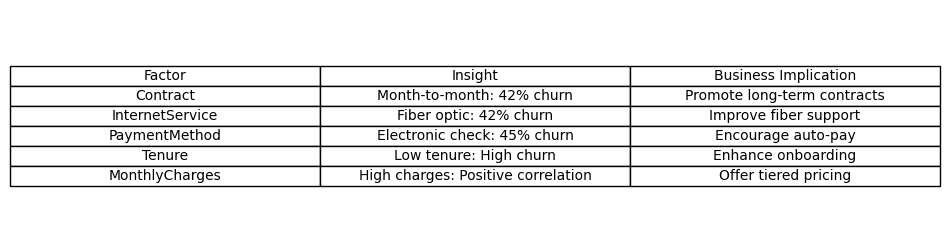

<Figure size 640x480 with 0 Axes>

In [13]:


# Your DataFrame
insights = pd.DataFrame({
    'Factor': ['Contract', 'InternetService', 'PaymentMethod', 'Tenure', 'MonthlyCharges'],
    'Insight': ['Month-to-month: 42% churn', 'Fiber optic: 42% churn', 'Electronic check: 45% churn',
                'Low tenure: High churn', 'High charges: Positive correlation'],
    'Business Implication': ['Promote long-term contracts', 'Improve fiber support', 'Encourage auto-pay',
                             'Enhance onboarding', 'Offer tiered pricing']
})

# Plot table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')  # Hide axes
table = ax.table(cellText=insights.values, colLabels=insights.columns, cellLoc='center', loc='center')

# Style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()
plt.savefig(f'../assets/pivottables.png')
